In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

In [123]:
df = pd.read_csv('flight_delays 1.csv', header = 0, sep=',')

In [124]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [125]:
def do_norm_table():
    df['Month']= df['Month'].apply(lambda x: x.split('-')[1])
    df['Month'] = df['Month'].apply(int)
    df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x.split('-')[1])
    df['DayofMonth'] = df['DayofMonth'].apply(int)
    df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x.split('-')[1])
    df['DayOfWeek'] = df['DayOfWeek'].apply(int)
df_delay   = df[df.dep_delayed_15min==1]
df_nodelay = df[df.dep_delayed_15min==0]
delays          = len(df_delay)
nodelays        = len(df_nodelay)
airlines        = sorted(df.UniqueCarrier.unique())
origins         = sorted(df.Origin.unique(), reverse=True)
destinations    = sorted(df.Dest.unique(), reverse=True)
numAirlines     = len(airlines)
numOrigins      = len(origins)
numDestinations = len(destinations)
minDist         = df.Distance.min()
maxDist         = df.Distance.max()

do_norm_table()
def no_yes(val):
    if 'Y' in val:
        return 1
    else:
        return 0
df['dep_delayed_15min'] = df['dep_delayed_15min'].apply(lambda x: no_yes(x))

In [126]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,0
1,4,20,3,1548,US,PIT,MCO,834,0
2,9,2,5,1422,XE,RDU,CLE,416,0
3,11,25,6,1015,OO,DEN,MEM,872,0
4,10,7,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,27,4,1515,MQ,DFW,GGG,140,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null int64
DayofMonth           100000 non-null int64
DayOfWeek            100000 non-null int64
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null int64
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


In [128]:
# df[df['dep_delayed_15min'] == 'Y'] = df[df['dep_delayed_15min'] == 0]
# df['dep_delayed_15min'] = df['dep_delayed_15min'].fillna(1)
# df[df['dep_delayed_15min'] == 'N'] = df[df['dep_delayed_15min'] == 0]
# df['dep_delayed_15min'] = df['dep_delayed_15min'].fillna(0)

In [129]:
# x = df['dep_delayed_15min'].value_counts()
# y = df['dep_delayed_15min']

In [130]:
# df['DepTime'].max()

In [131]:
#sns.pairplot(df)

In [132]:
#sns.distplot(df["Month"],kde=False,bins=25)

In [133]:
#sns.jointplot(x="Month",y="dep_delayed_15min",data=df,kind="hex")

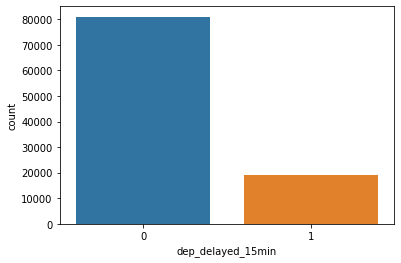

In [134]:
sns.countplot(x="dep_delayed_15min",data=df)

In [135]:
# sns.distplot(df['dep_delayed_15min'],kde=False,bins=2)

In [136]:
# df.corr()

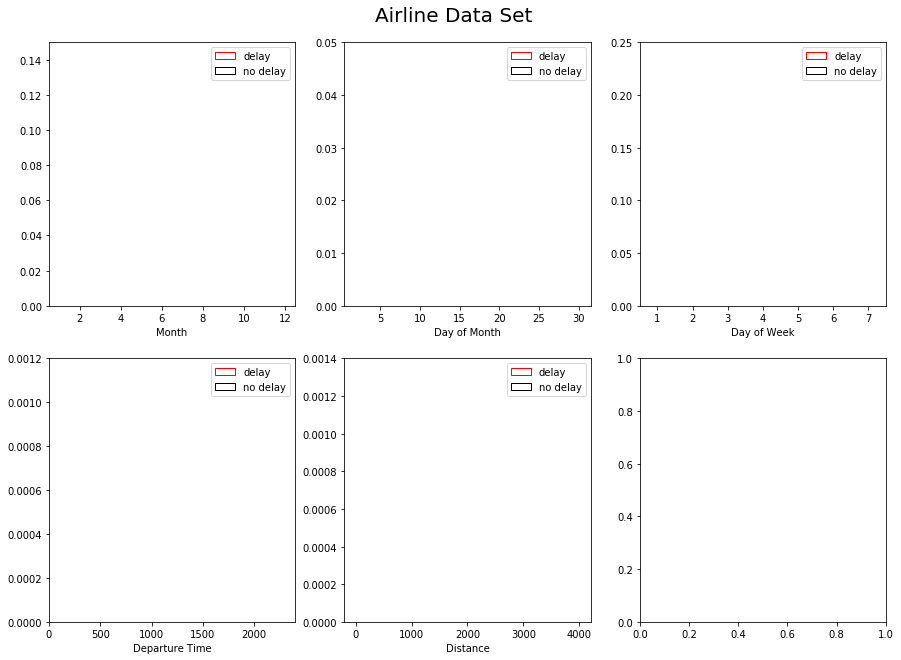

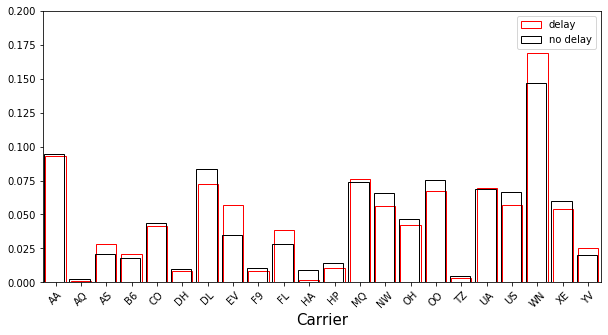

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots( nrows=2, ncols=3, figsize=(15,10) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.93 )
plt.suptitle("Airline Data Set", fontsize=20)
Ycol = ["red"]
Ncol = ["black"]


axes[0,0].hist(df_delay.Month,bins=12,range=[0.5,12.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
axes[0,0].hist(df_nodelay.Month,bins=12,range=[0.4,12.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
axes[0,0].set_xlabel("Month")
axes[0,0].set_xlim(0.5,12.5)
axes[0,0].set_ylim(0.0,0.15)
axes[0,0].legend(prop={'size': 10},loc="upper right")

axes[0,1].hist(df_delay.DayofMonth,bins=31,range=[0.5,31.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
axes[0,1].hist(df_nodelay.DayofMonth,bins=31,range=[0.4,31.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
axes[0,1].set_xlabel("Day of Month")
axes[0,1].set_xlim(0.5,31.5)
axes[0,1].set_ylim(0.0,0.05)
axes[0,1].legend(prop={'size': 10},loc="upper right")

axes[0,2].hist(df_delay.DayOfWeek,bins=7,range=[0.5,7.5],align="mid",
               color=Ycol,histtype="step",label="delay",density=True)
axes[0,2].hist(df_nodelay.DayOfWeek,bins=7,range=[0.4,7.4],align="mid",
               color=Ncol,histtype="step",label="no delay",density=True)
axes[0,2].set_xlabel("Day of Week")
axes[0,2].set_xlim(0.5,7.5)
axes[0,2].set_ylim(0.0,0.25)
axes[0,2].legend(prop={'size': 10},loc="upper right")

axes[1,0].hist(df_delay.DepTime,bins=24,range=[0,2400],
               color=Ycol,histtype="step",label="delay",density=True)
axes[1,0].hist(df_nodelay.DepTime,bins=24,range=[0,2400],
               color=Ncol,histtype="step",label="no delay",density=True)
axes[1,0].set_xlabel("Departure Time")
axes[1,0].set_xlim(0.0,2400.0)
axes[1,0].set_ylim(0.0,0.0012)
axes[1,0].legend(prop={'size': 10},loc="upper right")

axes[1,1].hist(df_delay.Distance,bins=50,range=[0,4000],
               color=Ycol,histtype="step",label="delay",density=True)
axes[1,1].hist(df_nodelay.Distance,bins=50,range=[0,4000],
               color=Ncol,histtype="step",label="no delay",density=True)
axes[1,1].set_xlabel("Distance")
axes[1,1].set_ylim(0.0,0.0014)
axes[1,1].legend(prop={'size': 10},loc="upper right")
plt.show()
#fig.savefig('FlightDelayFeatures1.png', dpi=200, bbox_inches='tight')

fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(10,5) )
bins      = np.arange(numAirlines)
heights   = df.groupby(["UniqueCarrier","dep_delayed_15min"]).size()
mulind    = pd.MultiIndex.from_product([airlines, [False, True]])
heights   = heights.reindex(mulind).replace(np.nan, 0)
heights1  = [heights[carrier,True] for carrier in airlines]
heights1  = [float(height)/sum(heights1) for height in heights1]
heights2  = [heights[carrier,False] for carrier in airlines]
heights2  = [float(height)/sum(heights2) for height in heights2]
axes.bar(bins,heights1,align="center",edgecolor=Ycol,color=["none"],label="delay")
axes.bar(bins-0.05,heights2,align="center",edgecolor=Ncol,color=["none"],label="no delay")
axes.set_xlabel("Carrier",fontsize=15)
axes.set_xticks(bins)
axes.set_xticklabels(airlines, ha="center", rotation=45.)
axes.set_xlim([-0.5,bins.size-0.5])
axes.set_ylim(0.0,0.20)
axes.legend(prop={'size': 10},loc="upper right")

In [90]:
df2 = pd.get_dummies(df,drop_first=False)
print(df2.describe(percentiles=[], include="all"))

               Month     DayofMonth     DayOfWeek        DepTime  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        6.537640      15.703850       3.95183    1341.523880   
std         3.413447       8.793931       1.99164     476.378445   
min         1.000000       1.000000       1.00000       1.000000   
50%         7.000000      16.000000       4.00000    1330.000000   
max        12.000000      31.000000       7.00000    2534.000000   

           Distance  dep_delayed_15min  UniqueCarrier_AA  UniqueCarrier_AQ  \
count  100000.00000       100000.00000      100000.00000     100000.000000   
mean      729.39716            0.19044           0.09418          0.002340   
std       574.61686            0.39265           0.29208          0.048317   
min        30.00000            0.00000           0.00000          0.000000   
50%       575.00000            0.00000           0.00000          0.000000   
max      4962.00000            1.00000           1.0000

In [91]:
import numpy as np
from collections import Counter

# Given two histograms x and y (with the same range and binning), the following function
# calculates the intrinsic discrepancy (a symmetrized Kullback-Leibler distance) between them.
def intrinsic_discrepancy(x,y):
    assert len(x)==len(y)
    sumx = np.sum(x)
    sumy = np.sum(y)
    xiny = False
    yinx = False
    for (xval,yval) in zip(x,y):
        if xval==0 and yval>0:
            xiny = True
        if xval>0 and yval==0:
            yinx = True
    if xiny and yinx:         # x and y supports not nested
        return float("inf")
    elif xiny:                # x support nested in y support
        id1  = 0.0
        for (xval,yval) in zip(x,y):
            if xval>0 and yval>0:
                id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
        return id1
    elif yinx:                # y support nested in x support
        id2  = 0.0
        for (xval,yval) in zip(x,y):
            if xval>0 and yval>0:
                id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
        return id2
    else:                     # x and y supports identical
        id1  = 0.0
        id2  = 0.0
        for (xval,yval) in zip(x,y):
            if (xval>0) and (yval>0):
                id1 += (float(xval)/sumx) * np.log((float(xval)/sumx)/(float(yval)/sumy))
                id2 += (float(yval)/sumy) * np.log((float(yval)/sumy)/(float(xval)/sumx))
        return min(id1,id2)

int_discr = {}
bin_edges        = np.linspace(0.5,12.5,13)
hist1,bin_edges1 = np.histogram(df_delay.Month,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df_nodelay.Month, bins=bin_edges, density=False)
int_discr["Month"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.5,31.5,32)
hist1,bin_edges1 = np.histogram(df_delay.DayofMonth,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df_nodelay.DayofMonth, bins=bin_edges, density=False)
int_discr["Day of the Month"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.5,7.5,8)
hist1,bin_edges1 = np.histogram(df_delay.DayOfWeek,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df_nodelay.DayOfWeek, bins=bin_edges, density=False)
int_discr["Day of the Week"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.0,2400.0,24)
hist1,bin_edges1 = np.histogram(df_delay.DepTime,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df_nodelay.DepTime, bins=bin_edges, density=False)
int_discr["Departure Time"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.0,5000.0,125)
hist1,bin_edges1 = np.histogram(df_delay.Distance,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df_nodelay.Distance, bins=bin_edges, density=False)
int_discr["Distance"] = intrinsic_discrepancy(hist1,hist2)
hist             = df.groupby(["Origin","dep_delayed_15min"]).size()
mulind           = pd.MultiIndex.from_product([origins, [False, True]])
hist             = hist.reindex(mulind).replace(np.nan, 0)
hist1            = [hist[origin,True] for origin in origins]
hist2            = [hist[origin,False] for origin in origins]
int_discr["Origin"] = intrinsic_discrepancy(hist1,hist2)
hist             = df.groupby(["Dest","dep_delayed_15min"]).size()
mulind           = pd.MultiIndex.from_product([destinations, [False, True]])
hist             = hist.reindex(mulind).replace(np.nan, 0)
hist1            = [hist[destination,True] for destination in destinations]
hist2            = [hist[destination,False] for destination in destinations]
int_discr["Destination"] = intrinsic_discrepancy(hist1,hist2)
hist             = df.groupby(["UniqueCarrier","dep_delayed_15min"]).size()
mulind           = pd.MultiIndex.from_product([airlines, [False, True]])
hist             = hist.reindex(mulind).replace(np.nan, 0)
hist1            = [hist[airline,True] for airline in airlines]
hist2            = [hist[airline,False] for airline in airlines]
int_discr["Airline"] = intrinsic_discrepancy(hist1,hist2)

id_list = Counter(int_discr).most_common()
print('Intrinsic discrepancies between delay and no-delay, in decreasing order: ')
for item in id_list:
    print('   %f  (%s)' % (item[1],item[0]))

Intrinsic discrepancies between delay and no-delay, in decreasing order: 
   0.020805  (Airline)
   0.000000  (Month)
   0.000000  (Day of the Month)
   0.000000  (Day of the Week)
   0.000000  (Departure Time)
   0.000000  (Distance)
   0.000000  (Origin)
   0.000000  (Destination)


In [52]:
df2_delay   = df2[df2.dep_delayed_15min==True]
df2_nodelay = df2[df2.dep_delayed_15min==False]

int_discr = {}
bin_edges        = np.linspace(0.5,12.5,13)
hist1,bin_edges1 = np.histogram(df2_delay.Month,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df2_nodelay.Month, bins=bin_edges, density=False)
int_discr["Month"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.5,31.5,32)
hist1,bin_edges1 = np.histogram(df2_delay.DayofMonth,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df2_nodelay.DayofMonth, bins=bin_edges, density=False)
int_discr["Day of the Month"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.5,7.5,8)
hist1,bin_edges1 = np.histogram(df2_delay.DayOfWeek,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df2_nodelay.DayOfWeek, bins=bin_edges, density=False)
int_discr["Day of the Week"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.0,2400.0,24)
hist1,bin_edges1 = np.histogram(df2_delay.DepTime,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df2_nodelay.DepTime, bins=bin_edges, density=False)
int_discr["Departure Time"] = intrinsic_discrepancy(hist1,hist2)
bin_edges        = np.linspace(0.0,5000.0,125)
hist1,bin_edges1 = np.histogram(df2_delay.Distance,   bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(df2_nodelay.Distance, bins=bin_edges, density=False)
int_discr["Distance"] = intrinsic_discrepancy(hist1,hist2)

# Now do the dummy variables, starting at column 7 to skip the 6 columns we already did, 
# plus the response column "dep_delayed_15min".
bin_edges   = np.linspace(-0.5, 1.5, 3)
for cname in list(df2.columns.values)[7:]:
    hist1,bin_edges1 = np.histogram(df2_delay[cname],   bins=bin_edges, density=False)
    hist2,bin_edges2 = np.histogram(df2_nodelay[cname], bins=bin_edges, density=False)
    int_discr[cname] = intrinsic_discrepancy(hist1, hist2)
    
id_list  = Counter(int_discr).most_common()
ndisplay = 20
print('Top %i intrinsic discrepancies between delay and no-delay, in decreasing order: ' %ndisplay)
for item in id_list[:ndisplay]:
    print('   %f  (%s)' % (item[1],item[0]))

Top 20 intrinsic discrepancies between delay and no-delay, in decreasing order: 
   0.248148  (Departure Time)
   0.018049  (Month)
   0.011412  (Distance)
   0.008321  (Day of the Week)
   0.005944  (Day of the Month)
   0.005042  (Origin_ATL)
   0.005019  (UniqueCarrier_EV)
   0.004443  (UniqueCarrier_HA)
   0.004084  (Origin_ORD)
   0.002718  (Origin_HNL)
   0.002303  (Dest_HNL)
   0.002258  (Dest_IAH)
   0.002248  (Dest_EWR)
   0.002064  (Dest_SLC)
   0.001870  (UniqueCarrier_WN)
   0.001808  (Dest_CVG)
   0.001537  (UniqueCarrier_FL)
   0.001523  (Dest_DFW)
   0.001214  (Origin_EWR)
   0.001165  (UniqueCarrier_AS)


In [53]:
import numpy as np
from sklearn.model_selection import train_test_split

test_fraction     = 0.30  # Fraction of total data set used for testing.
adjust_prevalence = False # Set to True to modify the prevalence in the training and/or testing data sets.
test_prevalence   = 0.60  # Desired prevalence in testing data set, only used if adjust_prevalence = True
train_prevalence  = 0.45  # Desired prevalence in training data set, only used if adjust_prevalence = True

np.random.seed(1)         # Random numbers are used by routine selectSubarray

# Routine to randomly mask off a fraction frac of elements equal to elval in array arr.
def selectSubarray( arr, elval, frac ):
    mask = np.ones(len(arr), dtype=bool)
    for ind,val in enumerate(arr):
        if val == elval:
            if np.random.uniform() <= frac:
                mask[ind] = False
    return mask

# Convert pandas dataframe to its numpy representation, separating out features from target variable.
features = df2.columns.values.tolist()
features.remove("dep_delayed_15min")
X0 = df2.as_matrix(columns=features)
Y0 = np.array([int(ybool) for ybool in df2["dep_delayed_15min"].tolist()])

# Make sure desired prevalences are larger than initial prevalence.
prev = float(len([y for y in Y0 if y==1]))/len(Y0)
print("Initial data set prevalence: %f" %prev)
assert test_prevalence >= prev,  "Desired test data set prevalence below current value"
assert train_prevalence >= prev, "Desired train data set prevalence below current value"

# If adjusting the prevalence differently in training and test data sets, the fraction of test data 
# needs to be adjusted to compensate.
if adjust_prevalence:
    test_f  = 1.0/(1.0+(train_prevalence/test_prevalence)*(1.0/test_fraction-1.0))
    test_d  = (1.0/prev - 1.0/test_prevalence)/(1.0/prev - 1.0)
    train_d = (1.0/prev - 1.0/train_prevalence)/(1.0/prev - 1.0)
else:
    test_f  = test_fraction

# Create training and test sets, with desired proportions.
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, Y0, test_size=test_f, random_state=0)

# Adjust prevalences by removing data points belonging to class 0.
if adjust_prevalence:
    mask    = selectSubarray( y_train0, 0, train_d)
    X_train = X_train0[mask]
    y_train = y_train0[mask]
    mask    = selectSubarray( y_test0, 0, test_d)
    X_test  = X_test0[mask]
    y_test  = y_test0[mask]
    X       = np.append( X_train, X_test, axis=0)
    Y       = np.append( y_train, y_test, axis=0)
else:
    X_train = X_train0[:]
    y_train = y_train0[:]
    X_test  = X_test0[:]
    y_test  = y_test0[:]
    X       = X0[:]
    Y       = Y0[:]

print("Training set size: %i, test set size: %i, total: %i, test fraction: %f" \
      %(len(y_train),len(y_test),len(Y),float(len(y_test))/len(Y)))
train_prevalence = float(len([y for y in y_train if y==1]))/len(y_train)
test_prevalence  = float(len([y for y in y_test if y==1]))/len(y_test)
print("Prevalence in training set: %f, in test set: %f" %(train_prevalence,test_prevalence))

F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Initial data set prevalence: 0.190440
Training set size: 70000, test set size: 30000, total: 100000, test fraction: 0.300000
Prevalence in training set: 0.191086, in test set: 0.188933


In [54]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=2, 
                             criterion="gini", min_samples_split=2, min_weight_fraction_leaf=0.0, 
                             max_features="auto", max_leaf_nodes=None, bootstrap=True,
                             oob_score=True, verbose=0, warm_start=False, random_state=0, 
                             n_jobs=-1, class_weight="balanced_subsample")
%time rf2.fit(X_train, y_train)

Wall time: 30.1 s


RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print("Estimator currently in use:\n\n%s\n" %rf2)

# score the model
Ntest    = len(y_test)
Ntestpos = len([val for val in y_test if val])
NullAcc  = float(Ntest-Ntestpos)/Ntest
print("Mean accuracy on Training set: %s" %rf2.score(X_train, y_train))
print("Mean accuracy on Test set:     %s" %rf2.score(X_test, y_test))
print("Null accuracy on Test set:     %s" %NullAcc)
print(" ")
y_true, y_pred = y_test, rf2.predict(X_test)
cm             = confusion_matrix(y_true, y_pred)
print("Confusion matrix:\ntn=%6d  fp=%6d\nfn=%6d  tp=%6d" %(cm[0][0],cm[0][1],cm[1][0],cm[1][1]))
print("\nDetailed classification report: \n%s" %classification_report(y_true, y_pred))

Estimator currently in use:

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, verbose=0, warm_start=False)

Mean accuracy on Training set: 0.6476571428571428
Mean accuracy on Test set:     0.6192
Null accuracy on Test set:     0.8110666666666667
 
Confusion matrix:
tn= 14545  fp=  9787
fn=  1637  tp=  4031

Detailed classification report: 
              precision    recall  f1-score   support

           0       0.90      0.60      0.72     24332
           1       0.29      0.71      0.41      5668

    accuracy                           0.62     30000
   macro avg       

Number of test values = 30000
Number of test values equal to True = 5668


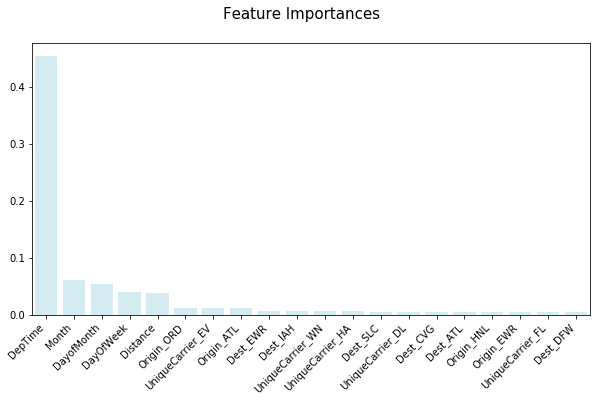

Number of thresholds = 29993
Delays in training set: 13376, no-delays: 56624
Delays in test set: 5668, no-delays: 24332
Intrinsic discrepancy in training set: inf, in test set: 0.29475501344093313


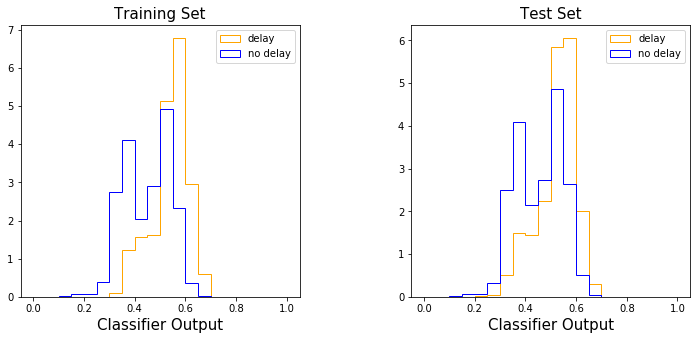

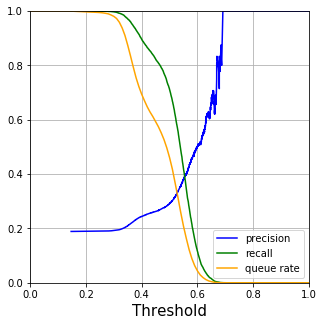

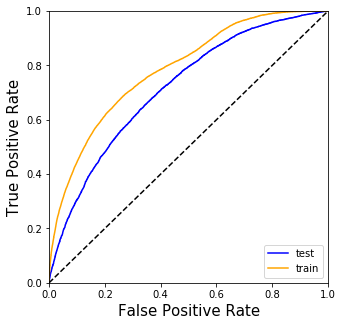

Area under test ROC =  0.7172140258127657
Area under train ROC = 0.7854930008798069


In [56]:
from sklearn import metrics
import numpy as np

print('Number of test values = %i' %len(y_test))
print('Number of test values equal to True = %i' %(len([val for val in y_test if val])))

# Compute and plot feature importances
importances = rf2.feature_importances_
indices     = np.argsort(importances)[::-1]
n_features  = min(20,indices.size)
bins        = np.arange(n_features)
x_labels    = np.array(features)[indices][:n_features]
fig, axes   = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.suptitle("Feature Importances", fontsize=15)
axes.bar(bins, importances[indices][:n_features], align="center", color="lightblue", alpha=0.5)
axes.set_xticks(bins)
axes.set_xticklabels(x_labels, ha="right", rotation=45.)
axes.set_xlim([-0.5,bins.size-0.5])
plt.show()
#fig.savefig('FeatureImportances.png', dpi=200, bbox_inches='tight')

# Compute precision, recall, and queue rate as a function of threshold
y_test_pred    = [p2 for [p1,p2] in rf2.predict_proba(X_test)]
y_train_pred   = [p2 for [p1,p2] in rf2.predict_proba(X_train)]
td0_precision, td0_recall, td0_thresholds = metrics.precision_recall_curve(y_test, y_test_pred)
td0_thresholds = np.append(td0_thresholds, 1)
n_thresholds   = td0_thresholds.size
print('Number of thresholds = %i' %n_thresholds)
n_max          = 100
qr_thresholds  = np.linspace(0.0, 1.0, n_max+1)
td0_queue_rate = []  
for threshold in qr_thresholds:  
    td0_queue_rate.append((y_test_pred >= threshold).mean())

# Histogram random forest output probabilities
y_train_pred_1 = [pred for (pred,truth) in zip(y_train_pred,y_train) if truth==1]
y_train_pred_0 = [pred for (pred,truth) in zip(y_train_pred,y_train) if truth==0]
y_test_pred_1  = [pred for (pred,truth) in zip(y_test_pred,y_test) if truth==1]
y_test_pred_0  = [pred for (pred,truth) in zip(y_test_pred,y_test) if truth==0]
print("Delays in training set: %i, no-delays: %i" %(len(y_train_pred_1),len(y_train_pred_0)))
print("Delays in test set: %i, no-delays: %i" %(len(y_test_pred_1),len(y_test_pred_0)))
bin_edges        = np.linspace(0.0,1.0,11)
hist1,bin_edges1 = np.histogram(y_train_pred_1, bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(y_train_pred_0, bins=bin_edges, density=False)
indis_train      = intrinsic_discrepancy(hist1, hist2)
hist1,bin_edges1 = np.histogram(y_test_pred_1, bins=bin_edges, density=False)
hist2,bin_edges2 = np.histogram(y_test_pred_0, bins=bin_edges, density=False)
indis_test       = intrinsic_discrepancy(hist1, hist2)
print("Intrinsic discrepancy in training set: %s, in test set: %s" %(indis_train,indis_test))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
plt.subplots_adjust(wspace=0.40)
axes[0].hist(y_train_pred_1, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[0].hist(y_train_pred_0, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[0].set_xlabel("Classifier Output", fontsize=15)
axes[0].legend(prop={'size': 10}, loc="upper right")
axes[0].set_title("Training Set", fontsize=15)
axes[1].hist(y_test_pred_1, bins=20, range=[0.0,1.0], color=Ycol, histtype="step", label="delay", density=True)
axes[1].hist(y_test_pred_0, bins=20, range=[0.0,1.0], color=Ncol, histtype="step", label="no delay", density=True)
axes[1].set_xlabel("Classifier Output", fontsize=15)
axes[1].legend(prop={'size': 10}, loc="upper right")
axes[1].set_title("Test Set", fontsize=15)
plt.show()
#fig.savefig('RF_probabilities.png', dpi=200, bbox_inches='tight')
    
# Plot precision, recall, and queue rate
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axis.plot(td0_thresholds, td0_precision, color="blue", label="precision")
axis.plot(td0_thresholds, td0_recall, color="green", label="recall")
axis.plot(qr_thresholds, td0_queue_rate, color="orange", label="queue rate")
axis.set_xlabel("Threshold", fontsize=15)
axis.set_xlim(0.0, 1.0)
axis.set_ylim(0.0, 1.0)
axis.grid(which="major", axis="both")
axis.legend(prop={'size': 10}, loc="lower right")
plt.show()
#fig.savefig("PRQ.png", dpi=200, bbox_inches="tight")

# Compute and plot ROC
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
fpr_test, tpr_test, thresholds   = metrics.roc_curve(y_test, y_test_pred)
auroc_test                       = metrics.auc(fpr_test,tpr_test)
fpr_train, tpr_train, thresholds = metrics.roc_curve(y_train, y_train_pred)
auroc_train                      = metrics.auc(fpr_train,tpr_train)
axis.plot(fpr_test, tpr_test, color="blue", label="test")
axis.plot(fpr_train, tpr_train, color="orange", label="train")
axis.plot([0.0,1.0], [0.0,1.0], 'k--')
axis.set_xlabel("False Positive Rate", fontsize=15)
axis.set_ylabel("True Positive Rate", fontsize=15)
axis.set_xlim(0.0, 1.0)
axis.set_ylim(0.0, 1.0)
axis.legend(prop={'size': 10}, loc="lower right")
plt.show()
#fig.savefig('ROC.png', dpi=200, bbox_inches='tight')

print('Area under test ROC =  %s' %auroc_test)
print('Area under train ROC = %s' %auroc_train)

In [42]:
#sns.heatmap(df.corr())

In [43]:
#plt.plot(df['dep_delayed_15min'],df['Month'])

In [44]:
Y = df['dep_delayed_15min']

In [45]:
X = df[['Month','DayofMonth','DayOfWeek','Distance']]

In [46]:
model = LinearRegression()

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [48]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model.coef_

array([ 1.98884033e-03,  1.07349613e-03,  1.84280759e-03, -2.11159807e-06])

In [50]:
metrics.mean_absolute_error(model.predict(X_test),Y_test)

0.3081477458869072

In [51]:
metrics.mean_squared_error(model.predict(X_test),Y_test)

0.15415910904956606

In [52]:
metrics.mean_squared_log_error(model.predict(X_test),Y_test)

0.07582775559178523

In [53]:
metrics.r2_score(model.predict(X_test),Y_test)

-1014.2526189560416

In [54]:
model.predict(X_test)

array([0.19109349, 0.191672  , 0.18522673, ..., 0.18801248, 0.18857478,
       0.19658267])

In [55]:
total = df['dep_delayed_15min'].count()
delayed = df['dep_delayed_15min'].sum()
not_delayed = total - delayed

In [56]:
procentage = round(df['dep_delayed_15min'].value_counts() * 100 / len(df),1)

In [57]:
procentage

0    81.0
1    19.0
Name: dep_delayed_15min, dtype: float64

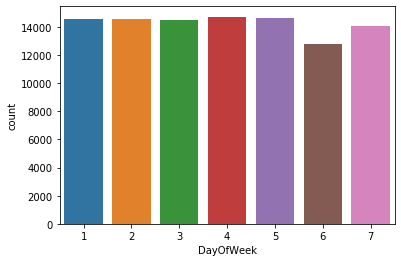

In [96]:
sns.countplot(x="DayOfWeek",data=df)

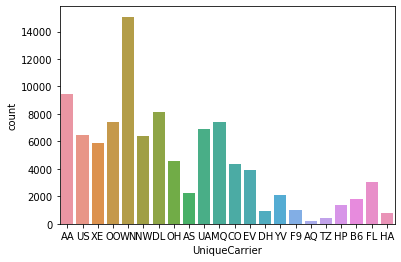

In [97]:
sns.countplot(x='UniqueCarrier', data=df)

In [98]:
# sns.set(style="whitegrid")

# f, ax = plt.subplots(figsize=(6, 15))

# sns.set_color_codes("pastel")
# sns.barplot(x=delayed, y="UniqueCarrier", data=df,
#             label="delayed", color="b")

# sns.set_color_codes("muted")
# sns.barplot(x=not_delayed, y="UniqueCarrier", data=df,
#             label="not_delayed", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)

In [99]:
# crashes

In [100]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    days_365 = days_in_month[:x['Month']-1].sum() + x['DayofMonth']
    return days_365

In [101]:
df['DayofMonth'] = df.apply(day_31_to_365,axis = 1)

In [102]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,233,7,1934,AA,ATL,DFW,732,0
1,4,110,3,1548,US,PIT,MCO,834,0
2,9,245,5,1422,XE,RDU,CLE,416,0
3,11,329,6,1015,OO,DEN,MEM,872,0
4,10,280,6,1828,WN,MDW,OMA,423,1
...,...,...,...,...,...,...,...,...,...
99995,5,124,3,1618,OO,SFO,RDD,199,0
99996,1,18,3,804,CO,EWR,DAB,884,0
99997,1,24,2,1901,NW,DTW,IAH,1076,0
99998,4,117,4,1515,MQ,DFW,GGG,140,0


In [103]:
# for i in df['DepTime']:
#     if i <=2400:
#         df['DepTime'] = np.ceil(df['DepTime']/600).apply(int)
#     else:
#         df['DepTime'] = 4
def dadada(val):
    if val <= 2400:
        g= df['DepTime'] = np.ceil(val/600)
        return g
    else:
        f = df['DepTime'] = np.round(val/600)
        return f
df['DepTime'] = df['DepTime'].apply(lambda x: round(dadada(x)),0)

In [115]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,WEEK
0,8,233,7,4,AA,ATL,DFW,732,0,33
1,4,110,3,3,US,PIT,MCO,834,0,15
2,9,245,5,3,XE,RDU,CLE,416,0,35
3,11,329,6,2,OO,DEN,MEM,872,0,47
4,10,280,6,4,WN,MDW,OMA,423,1,40
...,...,...,...,...,...,...,...,...,...,...
99995,5,124,3,3,OO,SFO,RDD,199,0,17
99996,1,18,3,2,CO,EWR,DAB,884,0,2
99997,1,24,2,4,NW,DTW,IAH,1076,0,3
99998,4,117,4,3,MQ,DFW,GGG,140,0,16


In [105]:
df['WEEK'] = df['DayofMonth']//7

In [106]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,WEEK
0,8,233,7,4,AA,ATL,DFW,732,0,33
1,4,110,3,3,US,PIT,MCO,834,0,15
2,9,245,5,3,XE,RDU,CLE,416,0,35
3,11,329,6,2,OO,DEN,MEM,872,0,47
4,10,280,6,4,WN,MDW,OMA,423,1,40
...,...,...,...,...,...,...,...,...,...,...
99995,5,124,3,3,OO,SFO,RDD,199,0,17
99996,1,18,3,2,CO,EWR,DAB,884,0,2
99997,1,24,2,4,NW,DTW,IAH,1076,0,3
99998,4,117,4,3,MQ,DFW,GGG,140,0,16


In [107]:
Delay_vs_Day_of_Week = pd.DataFrame({'delays' : df.groupby(['DayOfWeek'])['dep_delayed_15min'].mean()}).reset_index()
Delay_vs_WEEK = pd.DataFrame({'delays' : df.groupby(['WEEK'])['dep_delayed_15min'].mean()}).reset_index()
Delay_vs_AIRLINE = pd.DataFrame({'delays' : df.groupby(['UniqueCarrier'])['dep_delayed_15min'].mean()})#.reset_index()
Delay_vs_SCHEDULED_DEPARTURE = pd.DataFrame({'delays' : df.groupby(['DepTime'])['dep_delayed_15min'].mean()}).reset_index()

#Delay_vs_Day_of_Week.plot(x='DAY_OF_WEEK', y='delays')
#Delay_vs_Day_of_Week['delays'].hist(hold=None)

In [108]:
df['DepTime'].value_counts()

2.0    38266
3.0    37390
4.0    21944
1.0     2400
Name: DepTime, dtype: int64

[Text(0, 0, '00:00 - 06:00'),
 Text(0, 0, '06:00 - 12:00'),
 Text(0, 0, '12:00 - 18:00'),
 Text(0, 0, '18:00 - 00:00')]

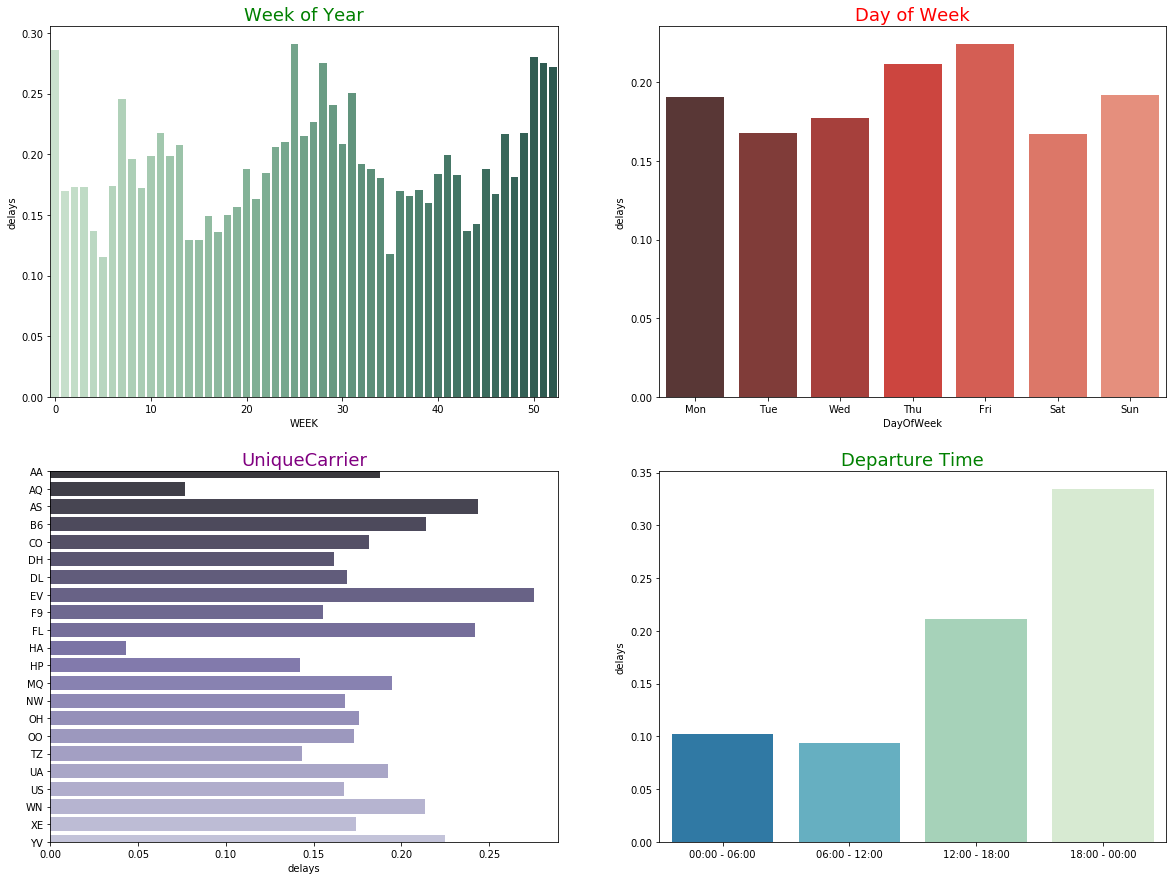

In [109]:
fig = plt.figure(figsize=(20, 15))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Week of Year', fontsize=18, color="green")
sns.barplot(x="WEEK", y="delays", data=Delay_vs_WEEK, palette="ch:2.5,-.2,dark=.3", ax = sub1)
sub1.set_xticks(list(range(0,52,10)))
sub1.set_xticklabels(list(range(0,52,10)))

sub2 = fig.add_subplot(222)
sub2.set_title('Day of Week', fontsize=18, color="red")
sns.barplot(x="DayOfWeek", y="delays", data=Delay_vs_Day_of_Week, palette="Reds_d", ax = sub2)
sub2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

sub3 = fig.add_subplot(223)
sub3.set_title('UniqueCarrier', fontsize=18, color="purple")
sns.barplot(y = list(range(len(Delay_vs_AIRLINE))), x=Delay_vs_AIRLINE['delays'], palette="Purples_d", ax = sub3, orient="h")
sub3.set_yticks(range(len(Delay_vs_AIRLINE)))
sub3.set_yticklabels(Delay_vs_AIRLINE.index)

sub4 = fig.add_subplot(224)
sns.barplot(x = list(range(len(Delay_vs_SCHEDULED_DEPARTURE))), y=Delay_vs_SCHEDULED_DEPARTURE['delays'], palette="GnBu_r", ax = sub4)
sub4.set_title('Departure Time', fontsize=18, color="green")
sub4.set_xticks([0, 1, 2, 3])
sub4.set_xticklabels(['00:00 - 06:00','06:00 - 12:00','12:00 - 18:00','18:00 - 00:00'])

In [110]:
flights_on_time = df[df['dep_delayed_15min']==0]
flights_on_delay = df[df['dep_delayed_15min']==1]

In [111]:
flights_on_time = flights_on_time['dep_delayed_15min']
flights_on_delay = flights_on_delay['dep_delayed_15min']

In [112]:
flights_on_delay

4        1
18       1
21       1
33       1
35       1
        ..
99971    1
99976    1
99980    1
99989    1
99993    1
Name: dep_delayed_15min, Length: 19044, dtype: int64

In [113]:
# sns.set(style="whitegrid")

# f, ax = plt.subplots(figsize=(16, 5))

# sns.set_color_codes("pastel")
# sns.barplot(x='UniqueCarrier', y=flights_on_delay, data=df,
#             label="delayed", color="b")

# sns.set_color_codes("muted")
# sns.barplot(x='UniqueCarrier', y=flights_on_time, data=df,
#             label="not_delayed", color="b")

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)

In [114]:
minDist

30